# Customer Segmentation Analysis

## Objective
Segment customers based on purchasing behavior, demographics, or preferences to help businesses target their marketing efforts.

## Dataset
The dataset used is the **Mall Customer Segmentation Data**, which includes:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
data = pd.read_csv(r"C:\Users\J A NAIDU\OneDrive\Desktop\Mall_Customers.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Drop unnecessary columns (e.g., CustomerID)
data = data.drop(['CustomerID'], axis=1)

# Encode categorical variables (e.g., Gender)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the cleaned dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


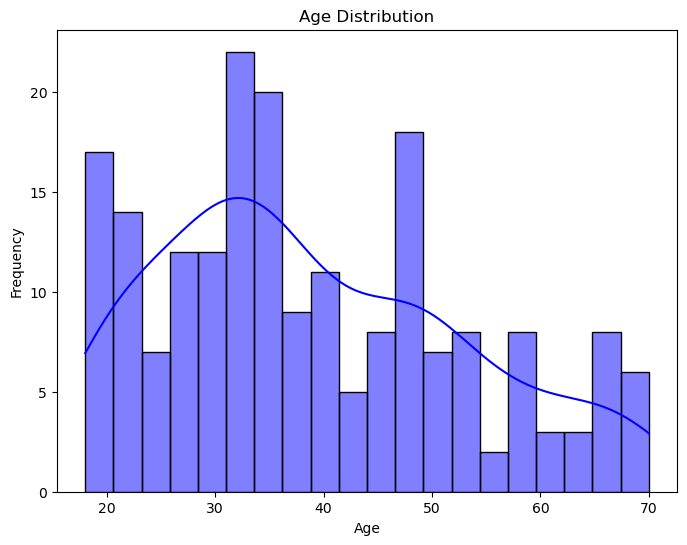

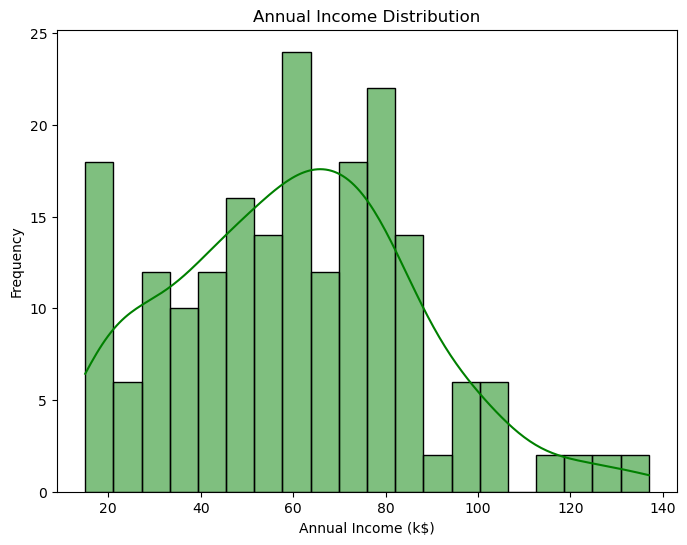

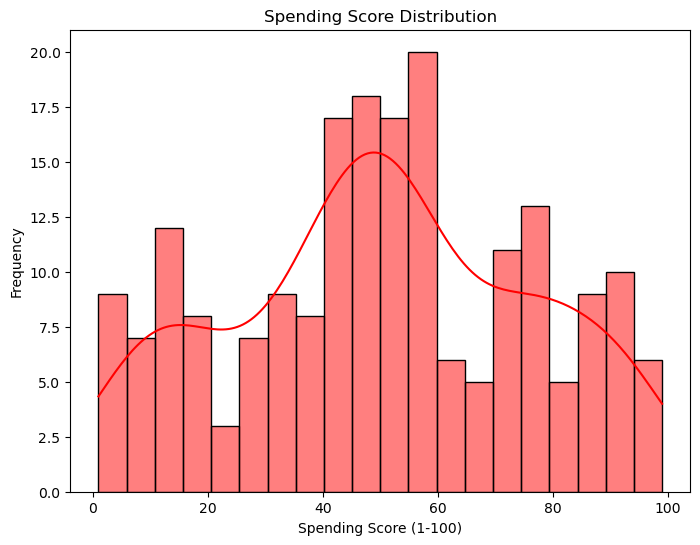

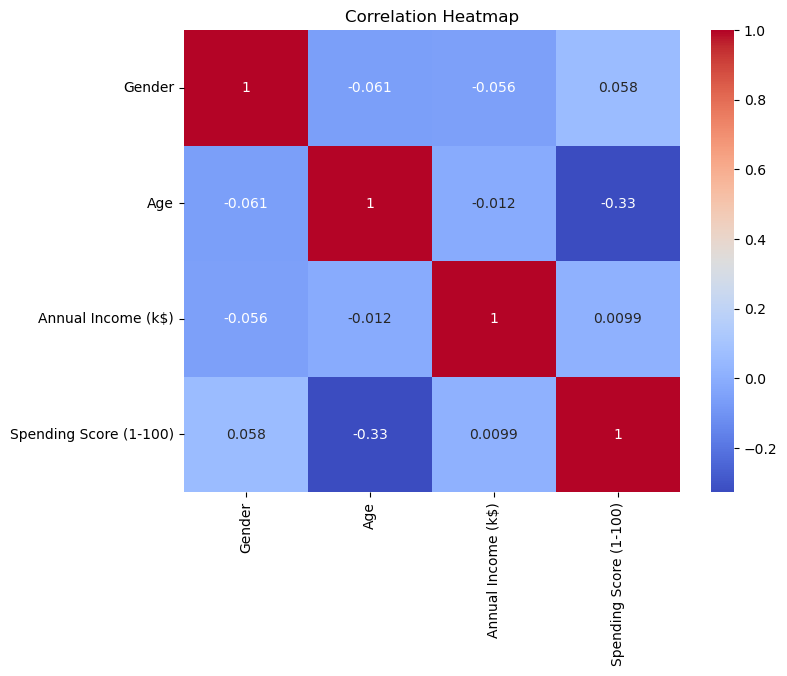

In [13]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Annual Income
plt.figure(figsize=(8, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Spending Score
plt.figure(figsize=(8, 6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Create income segments
data['Income Segment'] = pd.cut(data['Annual Income (k$)'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

# Create spending segments
data['Spending Segment'] = pd.cut(data['Spending Score (1-100)'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

# Display the first few rows with segments
print(data.head())

# Analyze each income segment
print("Income Segment Analysis:")
print(data.groupby('Income Segment', observed=False).agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean'  # Gender is encoded as 0 (Male) and 1 (Female)
}))

# Analyze each spending segment
print("Spending Segment Analysis:")
print(data.groupby('Spending Segment', observed=False).agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Gender': 'mean'
}))

   Gender  Age  Annual Income (k$)  Spending Score (1-100) Income Segment  \
0       0   19                  15                      39            Low   
1       0   21                  15                      81            Low   
2       1   20                  16                       6            Low   
3       1   23                  16                      77            Low   
4       1   31                  17                      40            Low   

  Spending Segment  
0              Low  
1             High  
2              Low  
3             High  
4              Low  
Income Segment Analysis:
                      Age  Spending Score (1-100)    Gender
Income Segment                                             
Low             35.280000               49.480000  0.640000
Medium          43.276316               50.684211  0.565789
High            36.666667               50.516667  0.466667
Spending Segment Analysis:
                        Age  Annual Income (k$)    Gender
S

## Insights and Recommendations

### Income Segments
1. **Low-Income Customers**:
   - Offer budget-friendly products and discounts.
   - Use personalized recommendations to increase engagement.

2. **Medium-Income Customers**:
   - Run promotions and highlight value-for-money products.
   - Encourage higher spending with bundle offers.

3. **High-Income Customers**:
   - Target with premium products and exclusive offers.
   - Focus on loyalty programs to retain them.

### Spending Segments
1. **Low-Spending Customers**:
   - Send personalized offers to encourage spending.
   - Highlight new arrivals or limited-time deals.

2. **Medium-Spending Customers**:
   - Run seasonal promotions and discounts.
   - Offer rewards for repeat purchases.

3. **High-Spending Customers**:
   - Promote luxury products and exclusive collections.
   - Offer VIP memberships or early access to sales.

## Conclusion
This analysis segmented customers based on income and spending behavior, providing actionable insights for targeted marketing. By tailoring strategies to each segment, businesses can improve customer engagement, retention, and sales.